In [20]:
import sys
sys.path.append('../')
import re
import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import json
from utils.rouge import RougeL
from utils.precision_recall_f1 import precision_recall_f1
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.style.use('ggplot')

## 保持全局长度下计算 label 的 ceil rougel

In [21]:
ori_ceil_rougels = []
zero_ceil_rougel_samples = set()

with open('../input/answer_mrc_dataset/all_train_full_content.json') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if not line.startswith('{'):
            continue

        sample = json.loads(line.strip())
        ori_ceil_rougels.append(sample['ceil_rougel'])
        
        if sample['ceil_rougel'] == 0:
            zero_ceil_rougel_samples.add(sample['question_id'])
        
        if sample['ceil_rougel'] < 0.6:
            print(sample['question_id'])

 12%|█▏        | 2877/24843 [00:00<00:03, 5764.85it/s]

Q_09884jndjy


 64%|██████▍   | 15847/24843 [00:02<00:01, 5752.83it/s]

Q_41856hsjkk


 71%|███████   | 17615/24843 [00:03<00:01, 5719.09it/s]

Q_06428qyysc


 85%|████████▌ | 21229/24843 [00:03<00:00, 5549.17it/s]

Q_21476ckdgg


 90%|████████▉ | 22336/24843 [00:03<00:00, 5250.35it/s]

Q_15475sshdd


100%|██████████| 24843/24843 [00:04<00:00, 5747.74it/s]


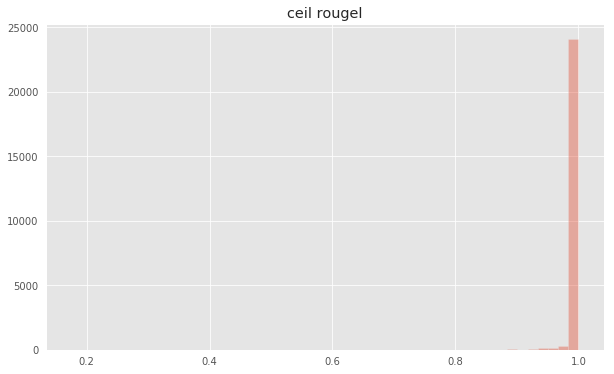

In [22]:
plt.figure(figsize=(10, 6))
sns.distplot(ori_ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [23]:
ori_ceil_rougels = np.array(ori_ceil_rougels)

In [24]:
ori_ceil_rougels = ori_ceil_rougels[ori_ceil_rougels > -1]

In [25]:
print('total:', ori_ceil_rougels.shape[0])
print('ceil rougel < 0.20:', ori_ceil_rougels[ori_ceil_rougels < 0.2].shape[0])
print('ceil rougel > 0.95:', ori_ceil_rougels[ori_ceil_rougels > 0.95].shape[0])
print('ceil rougel = 0:', ori_ceil_rougels[ori_ceil_rougels == 0].shape[0])
print('ceil rougel = 1:', ori_ceil_rougels[ori_ceil_rougels == 1].shape[0])

total: 24843
ceil rougel < 0.20: 1
ceil rougel > 0.95: 24523
ceil rougel = 0: 0
ceil rougel = 1: 23946


In [26]:
print(ori_ceil_rougels[ori_ceil_rougels == 1].shape[0] / ori_ceil_rougels.shape[0])
print(np.mean(ori_ceil_rougels))

0.9638932496075353
0.9981087908394777


## 训练集的 content 截断后的 ceil rougel

In [27]:
ori_ceil_rougels = []

zero_ceil_rougel_samples = set()

with open('../input/answer_mrc_dataset/train_max_content_len_1024.json') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if not line.startswith('{'):
            continue

        sample = json.loads(line.strip())
        ori_ceil_rougels.append(sample['ceil_rougel'])
        
        if sample['ceil_rougel'] == 0:
            zero_ceil_rougel_samples.add(sample['question_id'])

100%|██████████| 24338/24338 [00:02<00:00, 9639.01it/s]


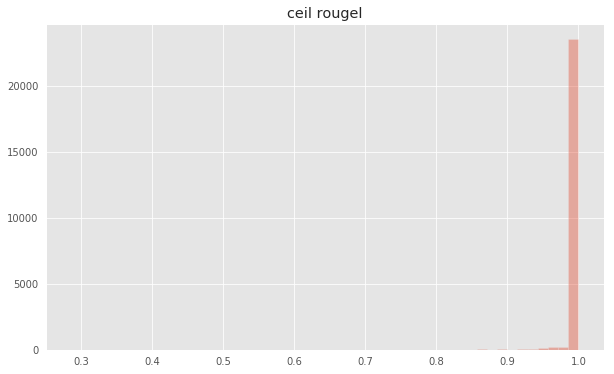

In [28]:
plt.figure(figsize=(10, 6))
sns.distplot(ori_ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [29]:
ori_ceil_rougels = np.array(ori_ceil_rougels)
ori_ceil_rougels = ori_ceil_rougels[ori_ceil_rougels > -1]

In [30]:
print('total:', ori_ceil_rougels.shape[0])
print('ceil rougel < 0.20:', ori_ceil_rougels[ori_ceil_rougels < 0.2].shape[0])
print('ceil rougel > 0.95:', ori_ceil_rougels[ori_ceil_rougels > 0.95].shape[0])
print('ceil rougel = 0:', ori_ceil_rougels[ori_ceil_rougels == 0].shape[0])
print('ceil rougel = 1:', ori_ceil_rougels[ori_ceil_rougels == 1].shape[0])

total: 24338
ceil rougel < 0.20: 0
ceil rougel > 0.95: 24014
ceil rougel = 0: 0
ceil rougel = 1: 23448


In [31]:
print(ori_ceil_rougels[ori_ceil_rougels == 1].shape[0] / ori_ceil_rougels.shape[0])
print(np.mean(ori_ceil_rougels))

0.9634316706385077
0.99794613242869
